In [1]:
import numpy as np
import pandas as pd
from numpy import sqrt, e, log
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import matplotlib.font_manager
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager
import seaborn as sns

In [2]:
def convert_zero(x):
    if x == 0:
        x = -1
    return x

df = pd.read_csv('data.csv') 
df['HeartDiseaseorAttack'] = df['HeartDiseaseorAttack'].apply(lambda x: int(x))
df['HeartDiseaseorAttack'] = df['HeartDiseaseorAttack'].apply(convert_zero)

In [3]:
def point_margin(x, alpha, h):
    """
    Calculate the margin of a point
    Args:
        x:      point
        alpha:  weights
        h:      classifiers
    """
    alpha_l1 = np.linalg.norm(alpha, ord=1)
    T = len(h)
    f = 0
    for i in range(T):
        f = alpha[i] * h[i].predict(x)
    margin = np.abs(f) / alpha_l1
    return margin

def sample_margin(X, alpha, h):
    """
    Calculate the margin of a sample
    Args:
        X:      sample
        alpha:  weights
        h:      classifiers
    """
    m = X.shape[0]
    margin = float('+inf')
    for i in range(m):
        x = X[i].reshape(1, -1)
        margin = min(margin, point_margin(x, alpha, h))
    return margin

def get_error_bound(rho, d, m, delta):
    """
    Calculate the error bound
    Args:
        rho:    margin
        d:      VC dimension
        m:      sample size
        delta:  confidence
    """
    first_term = sqrt((2 * d * log(e * m / d)) / m) * 2 / rho
    second_term = sqrt(log(1 / delta) / (2 * m))
    return first_term + second_term

In [4]:
delta = 0.05
def evaluate_error(df, delta):
    """
    Evaluate the error of the AdaBoost classifier
    Args:
        m:      sample size
        d:      VC dimension
        delta:  confidence
        T:      number of iterations
    """
    # Create the dataset
    X = df.drop(columns=['HeartDiseaseorAttack'])
    y = df['HeartDiseaseorAttack']

    X_train, X_test, y_test, y_train = train_test_split(X,y, test_size = 0.5)
    
    m = len(X_train)
    d = len(X_train.columns)
    
    X_train=X_train.to_numpy()
    X_test=X_test.to_numpy()
    y_train=y_train.to_numpy()
    y_test=y_test.to_numpy()

    # Train the AdaBoostClassifier with Perceptron base estimator
    clf = AdaBoostClassifier(
        base_estimator=Perceptron(penalty=None),
       # n_estimators=T,
        algorithm='SAMME',
        random_state=20,
    )
    clf.fit(X_train, y_train)

    alpha = clf.estimator_weights_
    h = clf.estimators_
    rho = sample_margin(X_train, alpha, h)

    R_test = 1 - clf.score(X_test, y_test)
    R_train = 1 - clf.score(X_train, y_train)
    error_bound = get_error_bound(rho, d, m, delta)

    return R_test, R_train, error_bound#, rho

In [6]:
df

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,-1,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,-1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,-1,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,-1,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,-1,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,-1,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,-1,1.0,1.0,1.0,18.0,0.0,0.0,2.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,-1,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,-1,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [7]:
X = df.drop(columns=['HeartDiseaseorAttack'])
y = df['HeartDiseaseorAttack']

X_train, X_test, y_test, y_train = train_test_split(X,y, test_size = 0.5)

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

/raid/kaisar_dauletbek/espnet/tools/anaconda/envs/espnet/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


0.9052034058656575


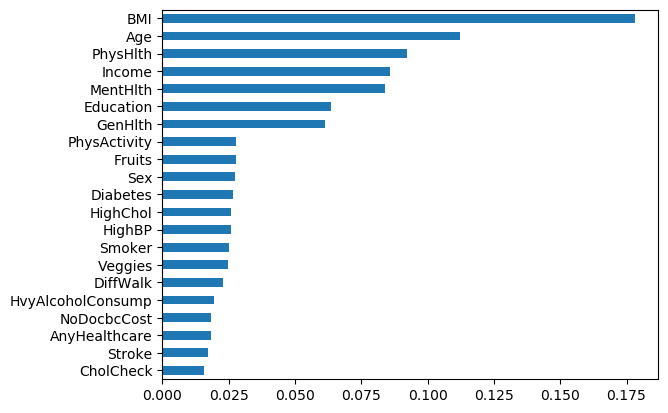

In [12]:
importances = model_rf.feature_importances_
weights = pd.Series(importances,
                 index=X_train.columns.values)
weights.sort_values()[-50:].plot(kind = 'barh')

In [21]:
weights = weights.sort_values(ascending=False)
columns = list(weights.keys())

In [54]:
len(df.columns)

22

In [56]:
error_bounds = []
errors_diff = []

exceptions = 0
indices = []

for i in tqdm(range(1, len(columns))):
    cols_to_use = columns[:i+1]
    df_exp = df[cols_to_use]
    df_exp['HeartDiseaseorAttack'] = df['HeartDiseaseorAttack']
    try:
        R_test, R_train, error_bound = evaluate_error(df_exp, 0.05)
        errors_diff.append(abs(R_test-R_train))
        error_bounds.append(error_bound)
        indices.append(i)
    except:
        exceptions += 1
        pass
    

  0%|                                                                                  | 0/20 [00:00<?, ?it/s]/tmp/ipykernel_3997253/3946645511.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exp['HeartDiseaseorAttack'] = df['HeartDiseaseorAttack']
  5%|███▋                                                                      | 1/20 [00:19<06:15, 19.76s/it]/tmp/ipykernel_3997253/3946645511.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exp['HeartDiseaseorAttack'] = df['HeartDiseaseorAttack'

 85%|██████████████████████████████████████████████████████████████           | 17/20 [04:54<00:47, 15.91s/it]/tmp/ipykernel_3997253/3946645511.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exp['HeartDiseaseorAttack'] = df['HeartDiseaseorAttack']
 90%|█████████████████████████████████████████████████████████████████▋       | 18/20 [05:02<00:27, 13.57s/it]/tmp/ipykernel_3997253/3946645511.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exp['HeartDiseaseorAttack'] = df['HeartDiseaseorAttack'

In [60]:
df_error_bounds_d = pd.DataFrame()
df_experiment_d = pd.DataFrame()

#error_bounds_exp = [i/len(error_bounds) for i in error_bounds]
df_error_bounds_d['d'] = indices
df_error_bounds_d['error'] = error_bounds
df_error_bounds_d['error'] = df_error_bounds_d['error'].apply(lambda x: x[0])

df_experiment_d['d'] = indices
df_experiment_d['error'] = errors_diff

In [85]:
error_bounds_sep = [get_error_bound(20, d, len(df)//2, 0.05) for d in tqdm(indices)]

100%|██████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 85860.88it/s]


In [99]:
df_bounds_d = pd.DataFrame()
df_bounds_d['bound'] = error_bounds_sep
df_bounds_d.to_csv('bounds_d.csv')

In [98]:
df_experiment_d['bound'] = error_bounds_sep
df_experiment_d.to_csv('experiment_d.csv')